**PIMA Indian Diabetes Prediction**

**Problem Statement**

India is considered to be the diabetes capital of the world. Diabetes is one of the primary causes of mortality in India. Diabetes is a chronic condition in which the body develops a resistance to insulin, a hormone which converts food into glucose. Diabetes affect many people worldwide and is normally divided into Type 1 and Type 2 diabetes.

* Type-I(insulin-dependent diabetes mellitus (IDDM)):- is a disorder of carbohydrate metabolism due to insufficient insulin secretion which could be hereditary or acquired.
* Type-II(non-insulin-dependent diabetes mellitus (NIDDM)):- diabetes is a condition in which the sensitivity of body cells to insulin gets reduced.
    
There are diagnostic tools available in the forms of Random Blood Sugar test, Fasting and PP (Post Prandial) Sugar test, and HbA1C test which is a glycated hemoglobin test. Though these reliable tests are available for years, it becomes very important to spot the disease early as many people might develop it silently especially in the young workforce.

**Objective**

To predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset using Machine Learning Models.

**Dataset Description**

Pima Indians Diabetes dataset is taken from Kaggle website. This data has originally come from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK).

The following features have been provided to help us predict whether a person is diabetic or not:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

**1. Importing necessary libraries**

In [36]:
## For data
import pandas as pd # pandas used for data manipulation on dataframe
import numpy as np # numpy used for mathematical operation on array

## For plotting
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
%matplotlib inline

## For Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

from numpy import log,dot,e,shape # used to calculate the natural logarithm,returns the dot product of vectors a and b

**2. Reading the Dataset**

In [37]:
import csv

# Open the CSV file
with open("diabetes (1).csv", "r") as file:
    # Create a CSV reader object
    data = csv.reader(file)
    data1 = [row for row in data]
    

In [38]:
column_names = data1[0]
column_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [39]:
data_rows = data1[1:]
data_rows

[['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'],
 ['1', '85', '66', '29', '0', '26.6', '0.351', '31', '0'],
 ['8', '183', '64', '0', '0', '23.3', '0.672', '32', '1'],
 ['1', '89', '66', '23', '94', '28.1', '0.167', '21', '0'],
 ['0', '137', '40', '35', '168', '43.1', '2.288', '33', '1'],
 ['5', '116', '74', '0', '0', '25.6', '0.201', '30', '0'],
 ['3', '78', '50', '32', '88', '31', '0.248', '26', '1'],
 ['10', '115', '0', '0', '0', '35.3', '0.134', '29', '0'],
 ['2', '197', '70', '45', '543', '30.5', '0.158', '53', '1'],
 ['8', '125', '96', '0', '0', '0', '0.232', '54', '1'],
 ['4', '110', '92', '0', '0', '37.6', '0.191', '30', '0'],
 ['10', '168', '74', '0', '0', '38', '0.537', '34', '1'],
 ['10', '139', '80', '0', '0', '27.1', '1.441', '57', '0'],
 ['1', '189', '60', '23', '846', '30.1', '0.398', '59', '1'],
 ['5', '166', '72', '19', '175', '25.8', '0.587', '51', '1'],
 ['7', '100', '0', '0', '0', '30', '0.484', '32', '1'],
 ['0', '118', '84', '47', '230', '45.8', '0.551',

In [40]:
df = pd.DataFrame(data1,columns=column_names) 
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [41]:
#setting column names equal to values in row index position 0
df.columns = df.iloc[0]

#removing first row from DataFrame
df = df[1:]

#viewing updated DataFrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


**3. Dataset Description**

In [42]:
# Reading first 5 Rows of the data

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# Reading last 5 Rows of the data

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [44]:
# Taking the sample of the data

df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
526,3,87,60,18,0,21.8,0.444,21,0


In [45]:
# Checking the shape of the data

df.shape

(768, 9)

In [46]:
# Checking the rows of the data

df.shape[0]

768

In [47]:
# Checking the column of the data

df.shape[1]

9

In [48]:
#Displaying the column names

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object', name=0)

In [49]:
#Checking the datatypes of features

df.dtypes

0
Pregnancies                 object
Glucose                     object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                         object
DiabetesPedigreeFunction    object
Age                         object
Outcome                     object
dtype: object

In [52]:
#Converting the datatype of columns
df = df.astype({'Pregnancies':'int'})

In [55]:
df = df.astype({'Glucose':'int'})
df = df.astype({'BloodPressure':'int'})
df = df.astype({'SkinThickness':'int'})
df = df.astype({'Insulin':'int'})
df = df.astype({'Age':'int'})
df = df.astype({'Outcome':'int'})

In [68]:
df = df.astype({'BMI':'float'})

In [69]:
df = df.astype({'DiabetesPedigreeFunction':'float'})

In [70]:
#Checking the datatype
print(df.dtypes)

0
Pregnancies                   int32
Glucose                       int32
BloodPressure                 int32
SkinThickness                 int32
Insulin                       int32
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int32
Outcome                       int32
dtype: object


In [71]:
#Outcome variable Distribution

df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [72]:
#Statistical details of data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Note:-**

There are a total of 9 variables in this dataset, with a total of 768 observations. "Outcome" is our Target Variable, which has two categories encoded as 0 if non-diabetic, 1 if diabetic, rest all are input features

**4. Data Cleaning and Preparation**

In [73]:
#N unique values
#We'll remove columns with only one unique value because their variance will be 0 and they won't help us anticipate anything.

#Checking the unique value counts in columns
featureValues={}
for d in df.columns.tolist():
    count=df[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


This signifies that there isn’t any column having only 1 unique value.

In [74]:
#Taking the null values sum

df.isnull().sum()

0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
#Taking the sum of na values

df.isna().sum()

0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Although in this dataset none of the columns contain missing values, some of the measurements (Glucose, Blood Pressure, Skin Thickness, Insulin and BMI) have values of 0, which is not possible for a living human organism.

**Counting the number of zeroes in each column**

In [76]:
#Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


**Replace Missing Values**

In [77]:
#Replacing the 0's as NaN
df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] =  df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)
print(df.isnull().sum())

0
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [78]:
#Displaying the top 10 values
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
2,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
3,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
9,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
10,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [79]:
#Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(7), int32(2)
memory usage: 48.1 KB


There are some missing values.

**Imputation of missing value with median**

In [80]:
median1=df['Pregnancies'].median()
median2=df['Glucose'].median()
median3=df['BloodPressure'].median()
median4=df['SkinThickness'].median()
median5=df['Insulin'].median()
median6=df['BMI'].median()

In [81]:
#Replacing the nan with the median and When inplace = True , the data is modified in place, 
#means the data will be modified without returning a copy of the data or the original data.
df['Pregnancies'].replace(np.nan,median1,inplace=True)
df['Glucose'].replace(np.nan,median2,inplace=True)
df['BloodPressure'].replace(np.nan,median3,inplace=True)
df['SkinThickness'].replace(np.nan,median4,inplace=True)
df['Insulin'].replace(np.nan,median5,inplace=True)
df['BMI'].replace(np.nan,median6,inplace=True)

In [82]:
#Displaying the top 10 values
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
2,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
3,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30,0
7,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29,0
9,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
10,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [83]:
#Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    int32  
dtypes: float64(7), int32(2)
memory usage: 48.1 KB


There are no null or missing values in our data now

In [84]:
#Checking for duplicate values

df.loc[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are no duplicate values

**Checking Outliers**

<AxesSubplot:>

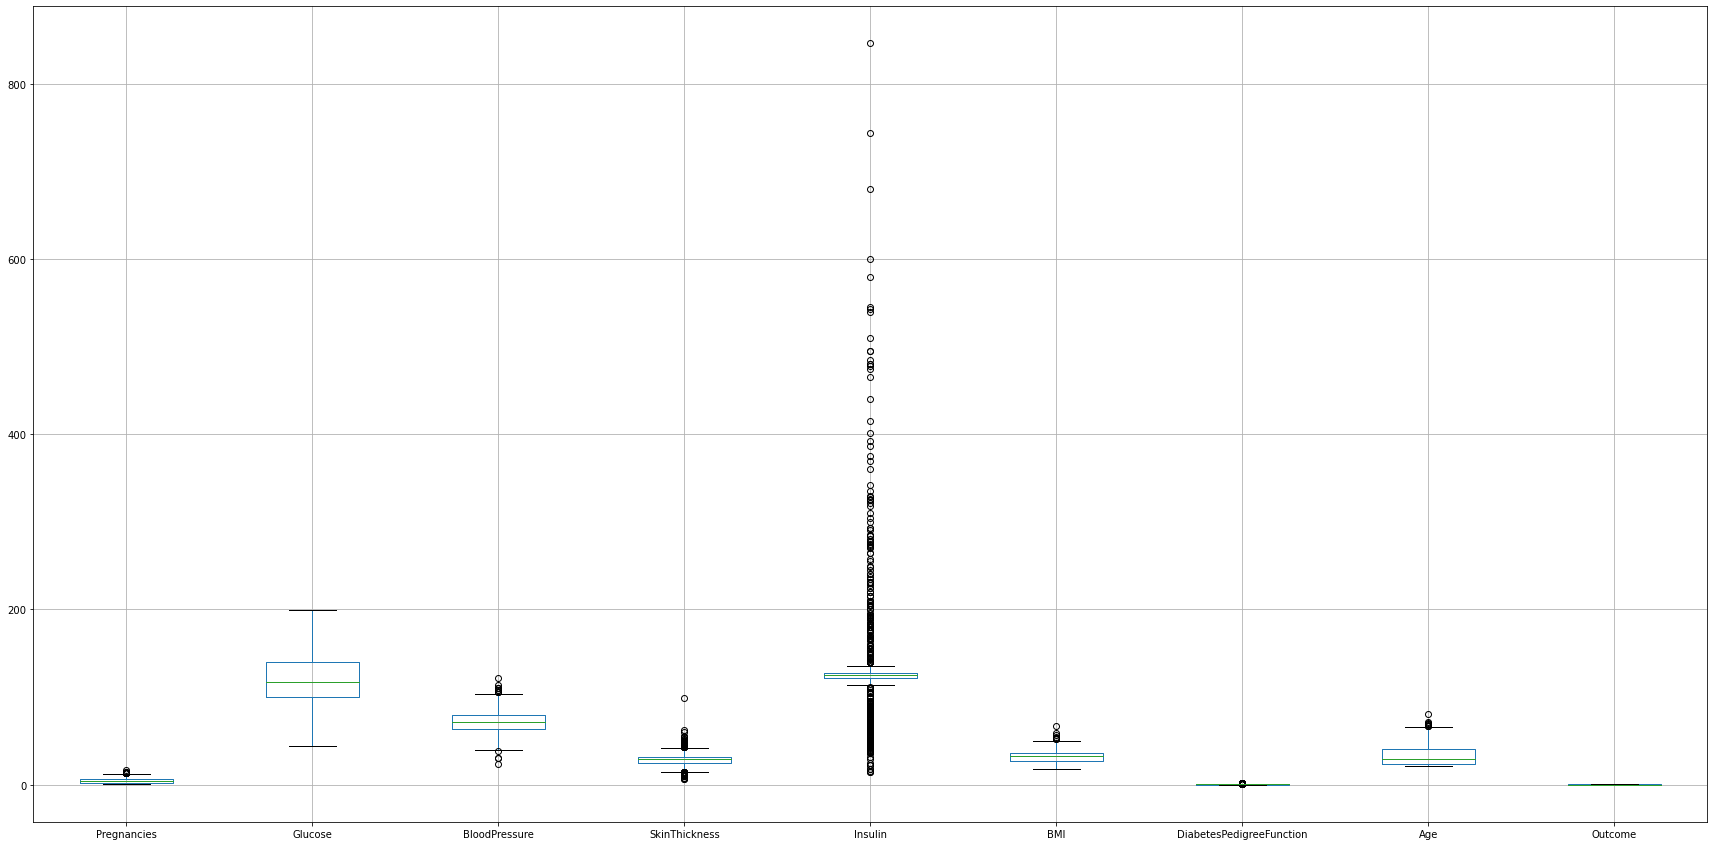

In [85]:
#Boxplot
df.boxplot(figsize=(30,15))

**Outlier Treatment**

In [86]:
#Capping
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
Q1 = np.percentile(df['Pregnancies'],25)
Q2 = np.percentile(df['Pregnancies'],50)
Q3 = np.percentile(df['Pregnancies'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Pregnancies']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Pregnancies'] = np.where(df['Pregnancies']>up_lim, up_lim, df['Pregnancies']) 
df['Pregnancies'] = np.where(df['Pregnancies']<low_lim, low_lim, df['Pregnancies'])
outlier = []
for x in df['Pregnancies']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 2.0
Q2= 4.0
Q3= 6.0
Interquartile range is 4.0
low_limit is -4.0
up_limit is 12.0
outlier in the dataset is [13.0, 13.0, 13.0, 15.0, 17.0, 13.0, 14.0, 13.0, 13.0, 14.0, 13.0, 13.0, 13.0, 13.0]
outlier in the dataset after capping is []


In [87]:
Q1 = np.percentile(df['Glucose'],25)
Q2 = np.percentile(df['Glucose'],50)
Q3 = np.percentile(df['Glucose'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Glucose']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Glucose'] = np.where(df['Glucose']>up_lim, up_lim, df['Glucose']) 
df['Glucose'] = np.where(df['Glucose']<low_lim, low_lim, df['Glucose'])
outlier = []
for x in df['Glucose']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 99.75
Q2= 117.0
Q3= 140.25
Interquartile range is 40.5
low_limit is 39.0
up_limit is 201.0
outlier in the dataset is []
outlier in the dataset after capping is []


In [88]:
Q1 = np.percentile(df['BloodPressure'],25)
Q2 = np.percentile(df['BloodPressure'],50)
Q3 = np.percentile(df['BloodPressure'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['BloodPressure']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['BloodPressure'] = np.where(df['BloodPressure']>up_lim, up_lim, df['BloodPressure']) 
df['BloodPressure'] = np.where(df['BloodPressure']<low_lim, low_lim, df['BloodPressure'])
outlier = []
for x in df['BloodPressure']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 64.0
Q2= 72.0
Q3= 80.0
Interquartile range is 16.0
low_limit is 40.0
up_limit is 104.0
outlier in the dataset is [30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 108.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]
outlier in the dataset after capping is []


In [89]:
Q1 = np.percentile(df['SkinThickness'],25)
Q2 = np.percentile(df['SkinThickness'],50)
Q3 = np.percentile(df['SkinThickness'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['SkinThickness']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['SkinThickness'] = np.where(df['SkinThickness']>up_lim, up_lim, df['SkinThickness']) 
df['SkinThickness'] = np.where(df['SkinThickness']<low_lim, low_lim, df['SkinThickness'])
outlier = []
for x in df['SkinThickness']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 25.0
Q2= 29.0
Q3= 32.0
Interquartile range is 7.0
low_limit is 14.5
up_limit is 42.5
outlier in the dataset is [45.0, 47.0, 11.0, 47.0, 11.0, 10.0, 60.0, 13.0, 13.0, 54.0, 51.0, 56.0, 14.0, 13.0, 50.0, 44.0, 12.0, 46.0, 44.0, 13.0, 44.0, 54.0, 14.0, 7.0, 50.0, 52.0, 10.0, 44.0, 43.0, 45.0, 14.0, 10.0, 11.0, 12.0, 43.0, 13.0, 12.0, 48.0, 43.0, 43.0, 8.0, 13.0, 14.0, 12.0, 49.0, 46.0, 46.0, 11.0, 8.0, 12.0, 63.0, 12.0, 45.0, 13.0, 48.0, 13.0, 10.0, 45.0, 7.0, 52.0, 49.0, 43.0, 14.0, 47.0, 99.0, 46.0, 11.0, 50.0, 45.0, 14.0, 13.0, 13.0, 47.0, 12.0, 48.0, 43.0, 46.0, 46.0, 45.0, 10.0, 46.0, 49.0, 11.0, 13.0, 46.0, 44.0, 48.0]
outlier in the dataset after capping is []


In [90]:
Q1 = np.percentile(df['Insulin'],25)
Q2 = np.percentile(df['Insulin'],50)
Q3 = np.percentile(df['Insulin'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Insulin']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Insulin'] = np.where(df['Insulin']>up_lim, up_lim, df['Insulin']) 
df['Insulin'] = np.where(df['Insulin']<low_lim, low_lim, df['Insulin'])
outlier = []
for x in df['Insulin']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 121.5
Q2= 125.0
Q3= 127.25
Interquartile range is 5.75
low_limit is 112.875
up_limit is 135.875
outlier in the dataset is [94.0, 168.0, 88.0, 543.0, 846.0, 175.0, 230.0, 83.0, 96.0, 235.0, 146.0, 140.0, 110.0, 245.0, 54.0, 192.0, 207.0, 70.0, 240.0, 82.0, 36.0, 23.0, 300.0, 342.0, 304.0, 110.0, 142.0, 38.0, 100.0, 90.0, 140.0, 270.0, 71.0, 71.0, 110.0, 176.0, 48.0, 64.0, 228.0, 76.0, 64.0, 220.0, 40.0, 152.0, 140.0, 18.0, 36.0, 495.0, 37.0, 175.0, 51.0, 100.0, 100.0, 99.0, 94.0, 145.0, 168.0, 225.0, 49.0, 140.0, 50.0, 92.0, 325.0, 63.0, 284.0, 204.0, 155.0, 485.0, 94.0, 53.0, 105.0, 285.0, 156.0, 78.0, 48.0, 55.0, 92.0, 23.0, 495.0, 58.0, 160.0, 94.0, 210.0, 48.0, 99.0, 318.0, 44.0, 190.0, 280.0, 87.0, 175.0, 271.0, 478.0, 190.0, 56.0, 32.0, 744.0, 53.0, 370.0, 37.0, 45.0, 192.0, 88.0, 176.0, 194.0, 680.0, 402.0, 55.0, 258.0, 375.0, 150.0, 67.0, 56.0, 45.0, 57.0, 278.0, 155.0, 545.0, 220.0, 49.0, 75.0, 40.0, 74.0, 182.0, 194.0, 360.0, 215.0, 184.0, 42.0, 105.0, 148.0, 180.0, 205.0,

In [91]:
Q1 = np.percentile(df['BMI'],25)
Q2 = np.percentile(df['BMI'],50)
Q3 = np.percentile(df['BMI'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['BMI']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['BMI'] = np.where(df['BMI']>up_lim, up_lim, df['BMI']) 
df['BMI'] = np.where(df['BMI']<low_lim, low_lim, df['BMI'])
outlier = []
for x in df['BMI']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 27.5
Q2= 32.3
Q3= 36.6
Interquartile range is 9.100000000000001
low_limit is 13.849999999999998
up_limit is 50.25
outlier in the dataset is [53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]
outlier in the dataset after capping is []


In [92]:
Q1 = np.percentile(df['DiabetesPedigreeFunction'],25)
Q2 = np.percentile(df['DiabetesPedigreeFunction'],50)
Q3 = np.percentile(df['DiabetesPedigreeFunction'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['DiabetesPedigreeFunction']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']>up_lim, up_lim, df['DiabetesPedigreeFunction']) 
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']<low_lim, low_lim, df['DiabetesPedigreeFunction'])
outlier = []
for x in df['DiabetesPedigreeFunction']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 0.24375
Q2= 0.3725
Q3= 0.62625
Interquartile range is 0.38249999999999995
low_limit is -0.32999999999999996
up_limit is 1.2
outlier in the dataset is [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
outlier in the dataset after capping is []


In [93]:
Q1 = np.percentile(df['Age'],25)
Q2 = np.percentile(df['Age'],50)
Q3 = np.percentile(df['Age'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Age'] = np.where(df['Age']>up_lim, up_lim, df['Age']) 
df['Age'] = np.where(df['Age']<low_lim, low_lim, df['Age'])
outlier = []
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 24.0
Q2= 29.0
Q3= 41.0
Interquartile range is 17.0
low_limit is -1.5
up_limit is 66.5
outlier in the dataset is [69, 67, 72, 81, 67, 67, 70, 68, 69]
outlier in the dataset after capping is []


<AxesSubplot:>

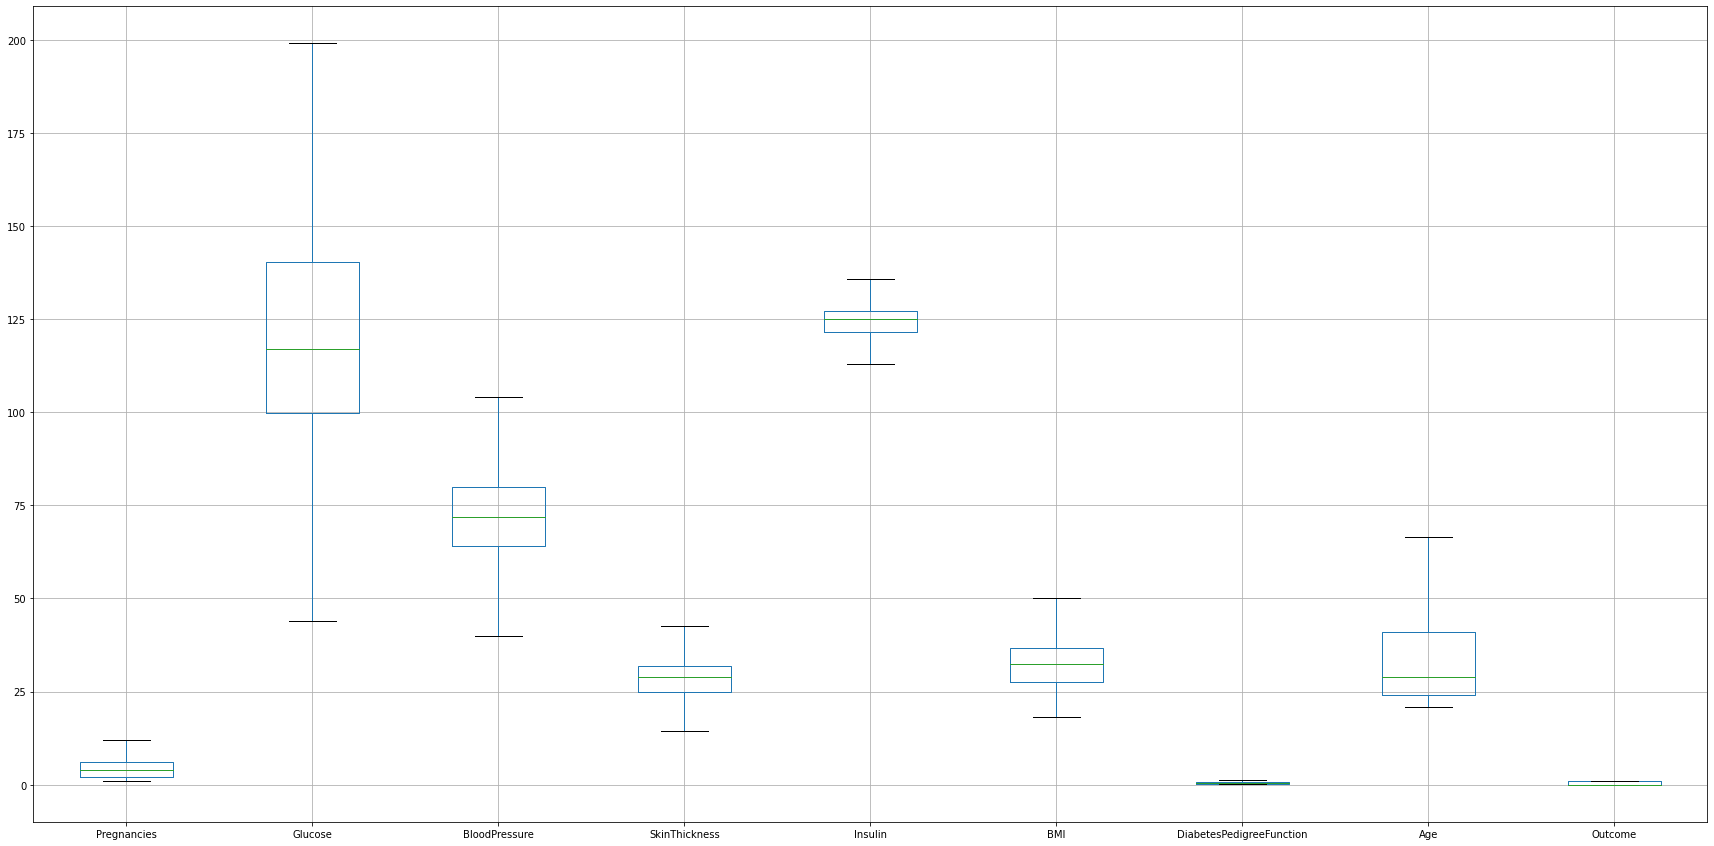

In [94]:
df.boxplot(figsize=(30,15))

The outliers are treated using the capping method.